# Requirements

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## The Water Potability Dataset

## Downloading the Water Potability Dataset

In [3]:
# !gdown 1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW # Download the dataset.

## Exploring the Water Potability Dataset
The Water Potability dataset contains water quality metrics for 3276 different water bodies. The dataset includes ten attributes, each providing valuable information about water characteristics. These attributes encompass pH value, hardness, total dissolved solids (TDS), chloramines, sulfate concentration, conductivity, organic carbon, trihalomethanes, turbidity, and the target variable, potability. pH value is crucial for assessing the acid–base balance, while hardness indicates the presence of calcium and magnesium salts. TDS measures the mineral content, chloramines are disinfectants, sulfate is a natural substance found in minerals, conductivity indicates water's ability to conduct electric current, organic carbon measures carbon in organic compounds, and trihalomethanes are chemicals found in chlorine-treated water. Turbidity assesses the quantity of solid matter in suspended state. The target variable, 'Potability,' is binary (1 for potable and 0 for not potable), indicating whether water is safe for human consumption.

Load the dataset into a `pandas` data frame.

In [4]:
data = pd.read_csv('data/water-potability.csv')

Explore the dataset using visualizations of your choice.

In [5]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

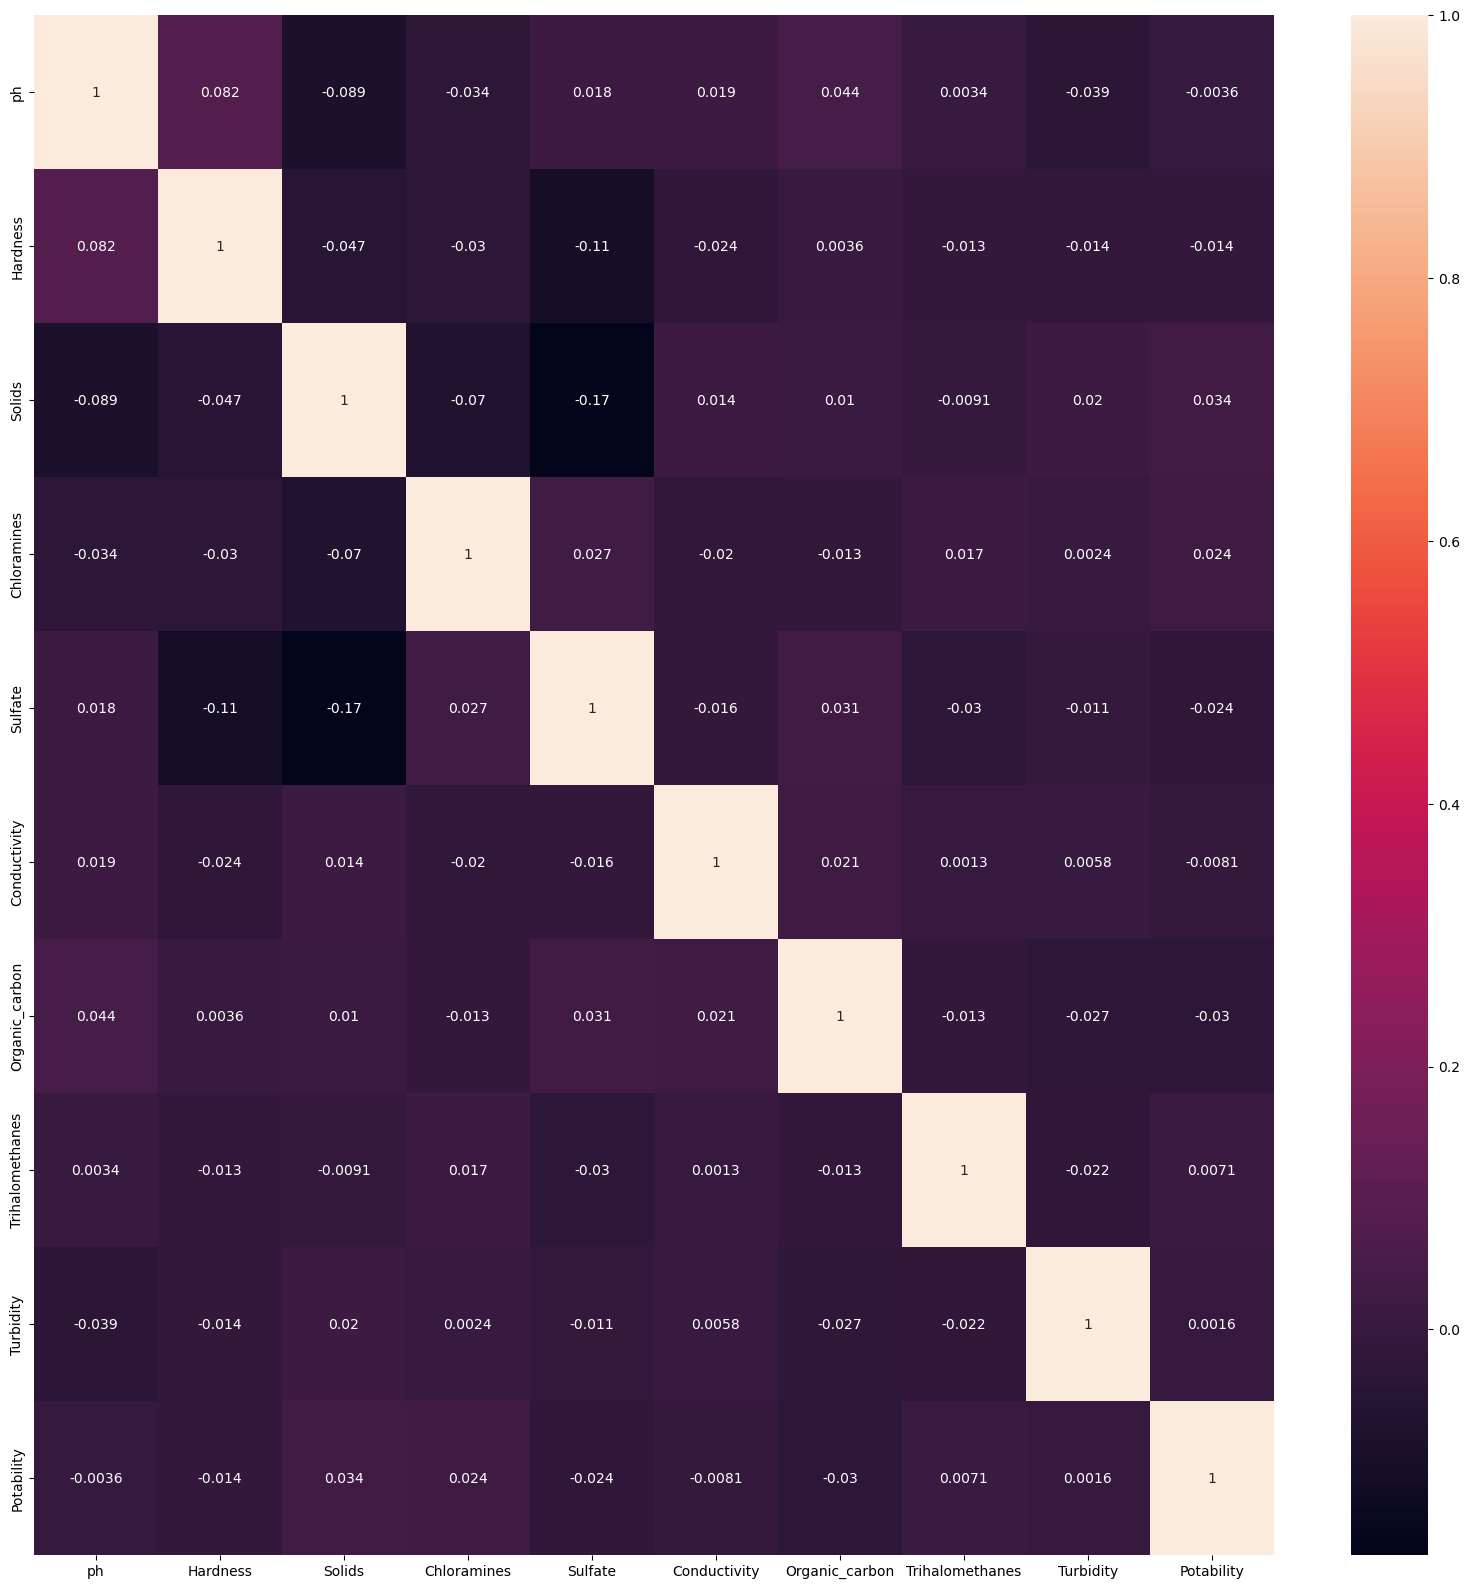

In [8]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

Check if the dataset is balanced.

In [9]:
b = data['Potability'].value_counts() / len(data) * 100
b = b.reset_index().rename(columns={"count": "percent"})
b

,Potability,percent
0,0,60.989011
1,1,39.010989


In [10]:
class_counts = data['Potability'].value_counts(normalize=True)
print(class_counts)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [11]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

,column,percent missing
0,ph,14.987790
1,Hardness,0.000000
2,Solids,0.000000
3,Chloramines,0.000000
4,Sulfate,23.840049
5,Conductivity,0.000000
6,Organic_carbon,0.000000
7,Trihalomethanes,4.945055
8,Turbidity,0.000000
9,Potability,0.000000


In [12]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

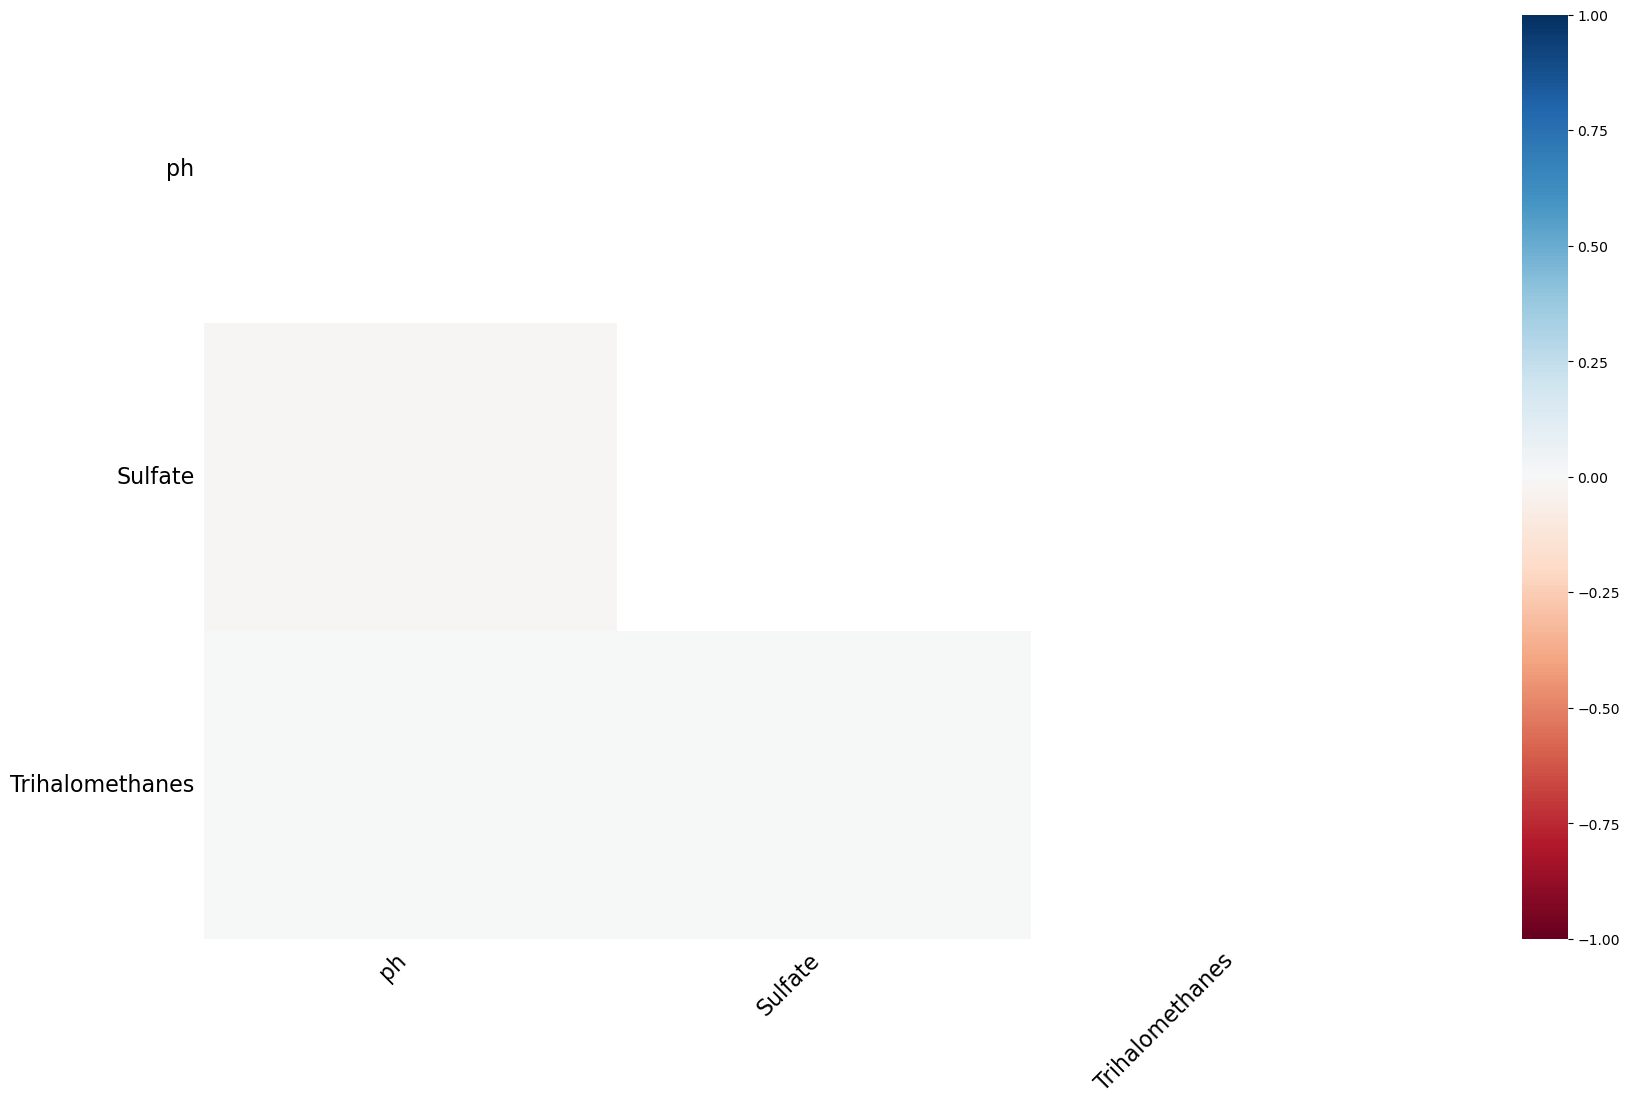

In [13]:
msno.heatmap(data)
plt.show()

<Axes: >

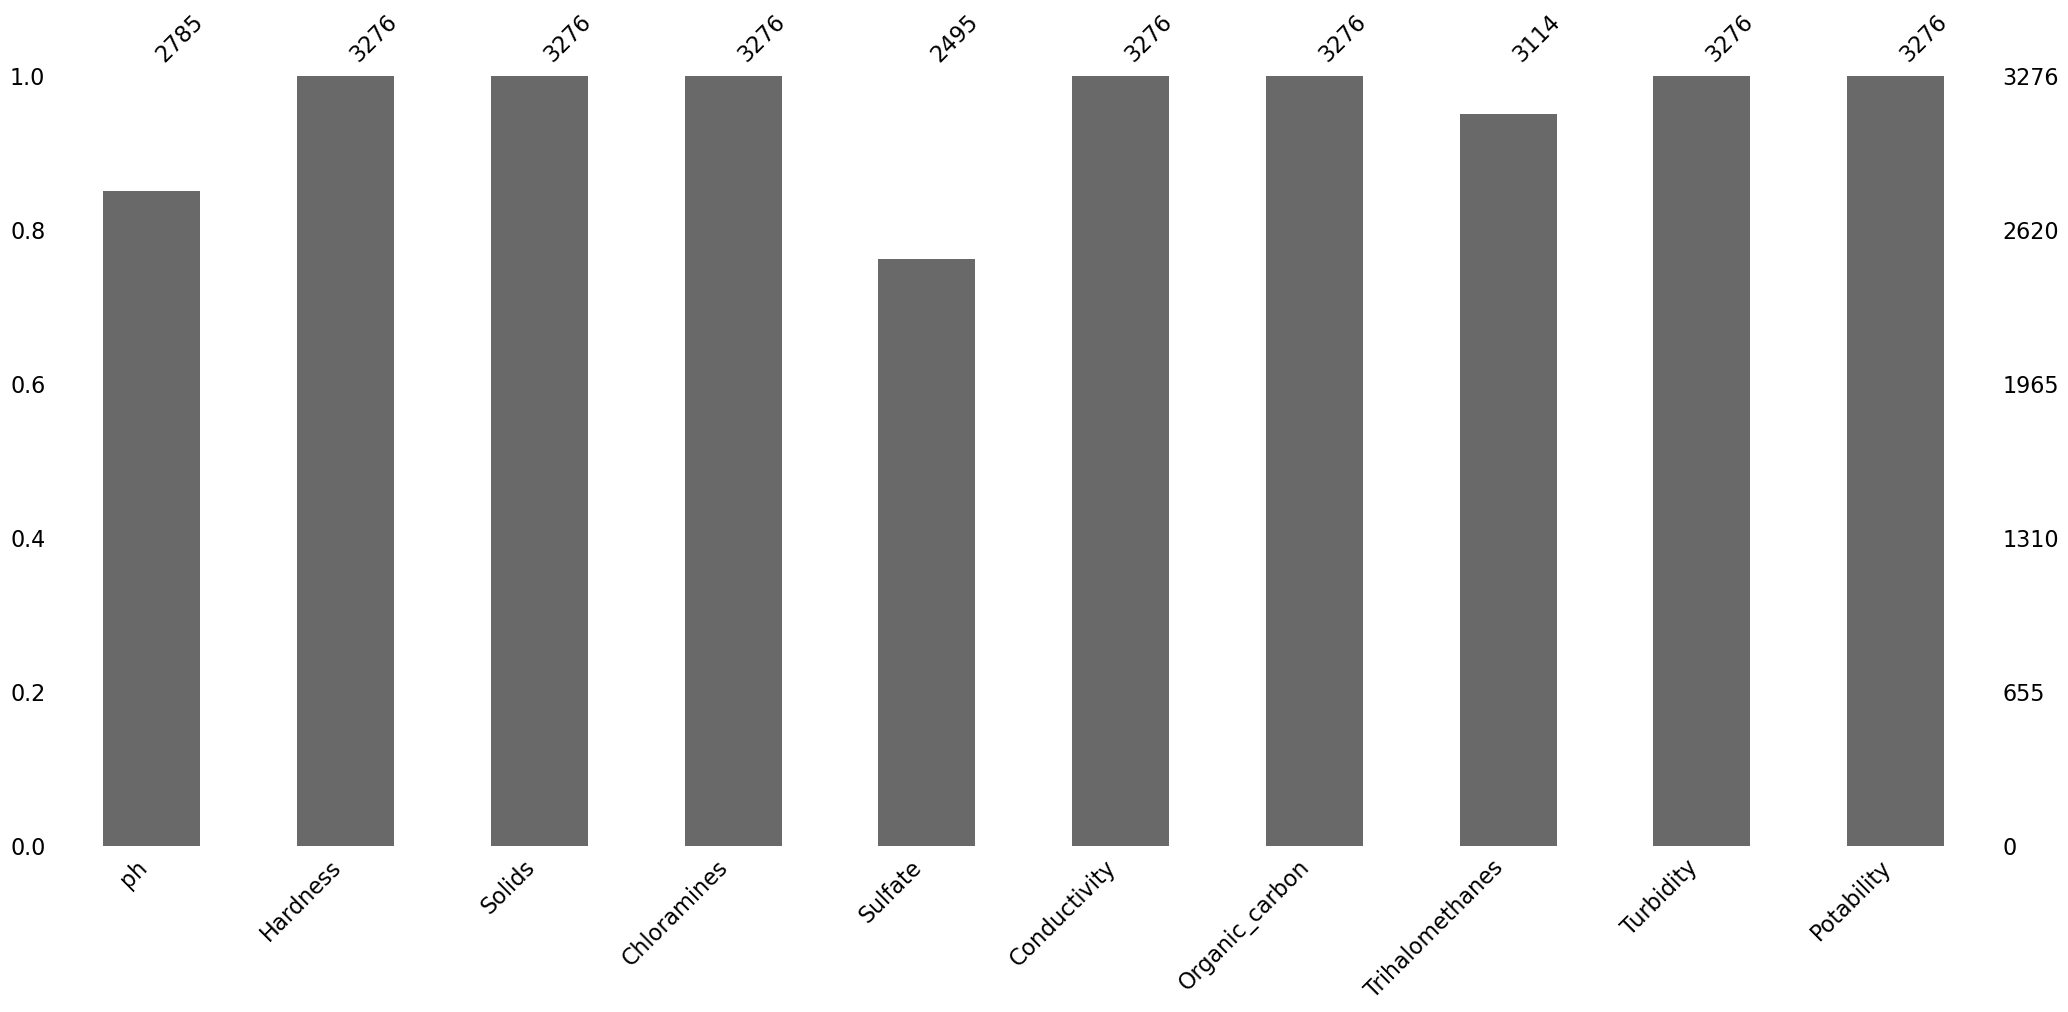

In [14]:
msno.bar(data)

<Axes: >

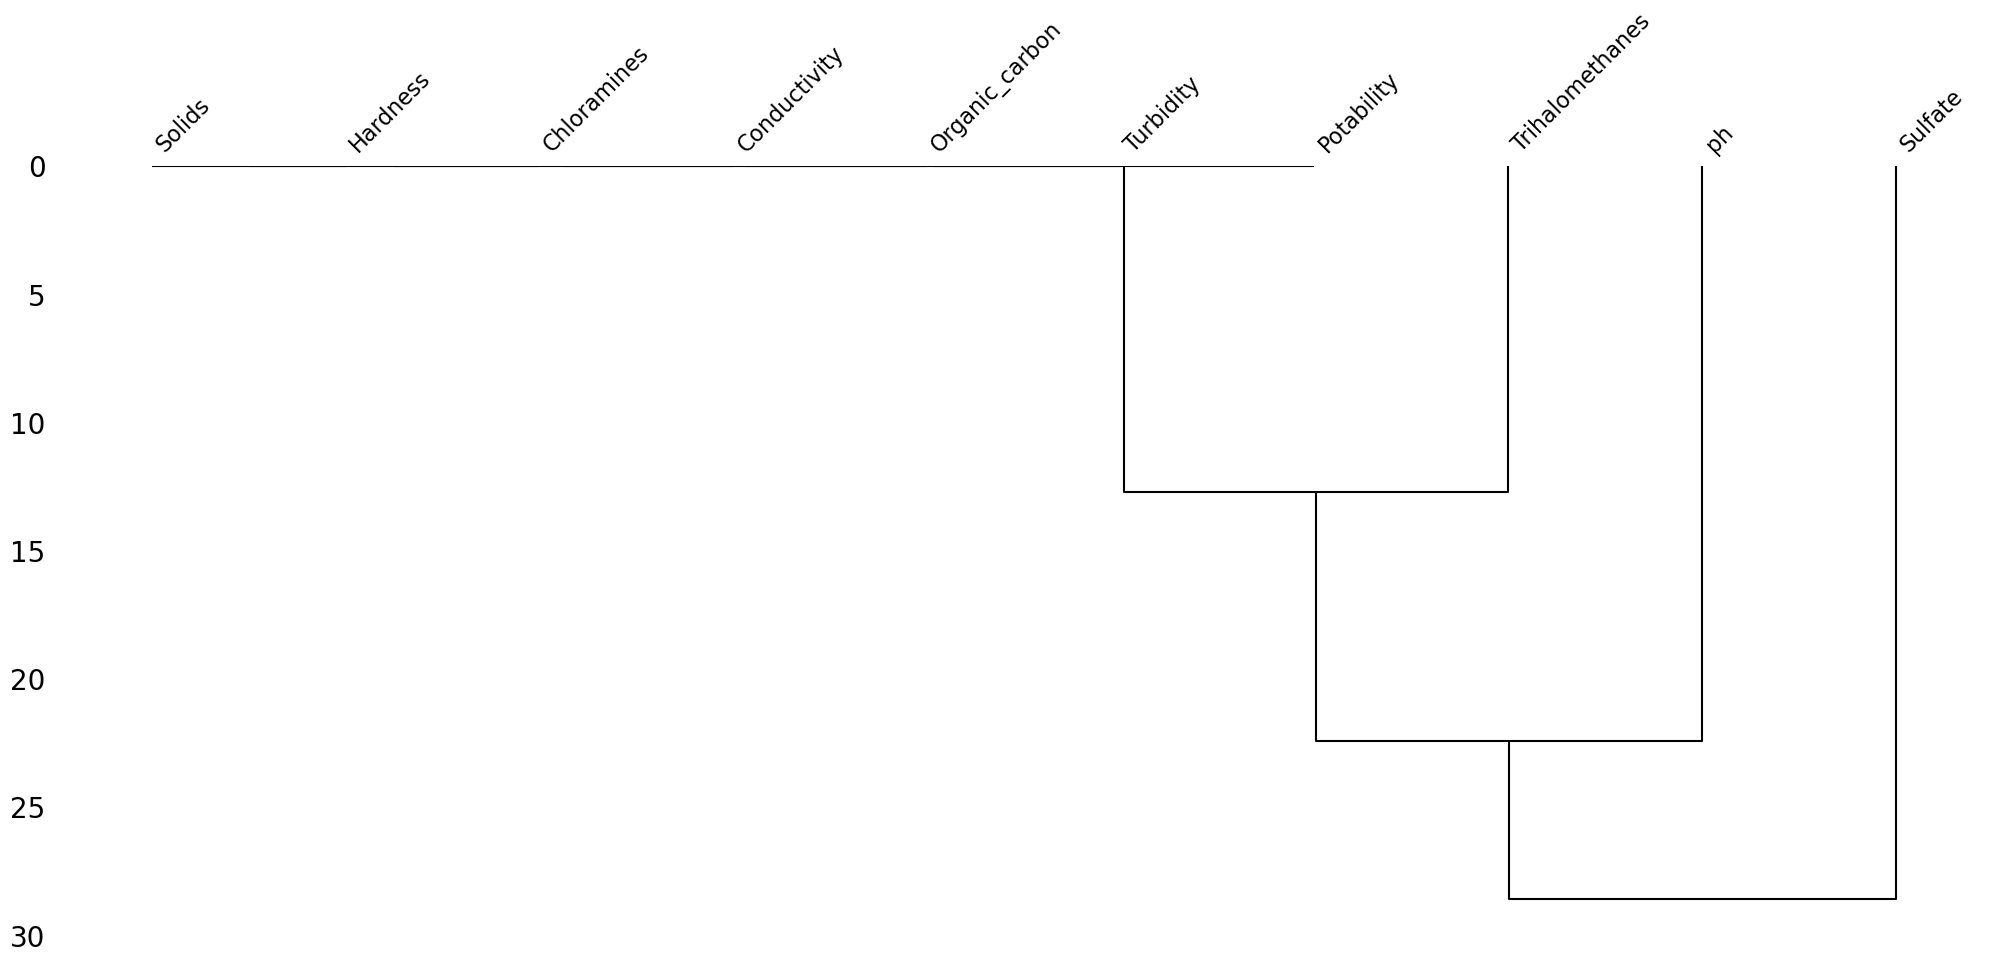

In [15]:
msno.dendrogram(data)


<Axes: >

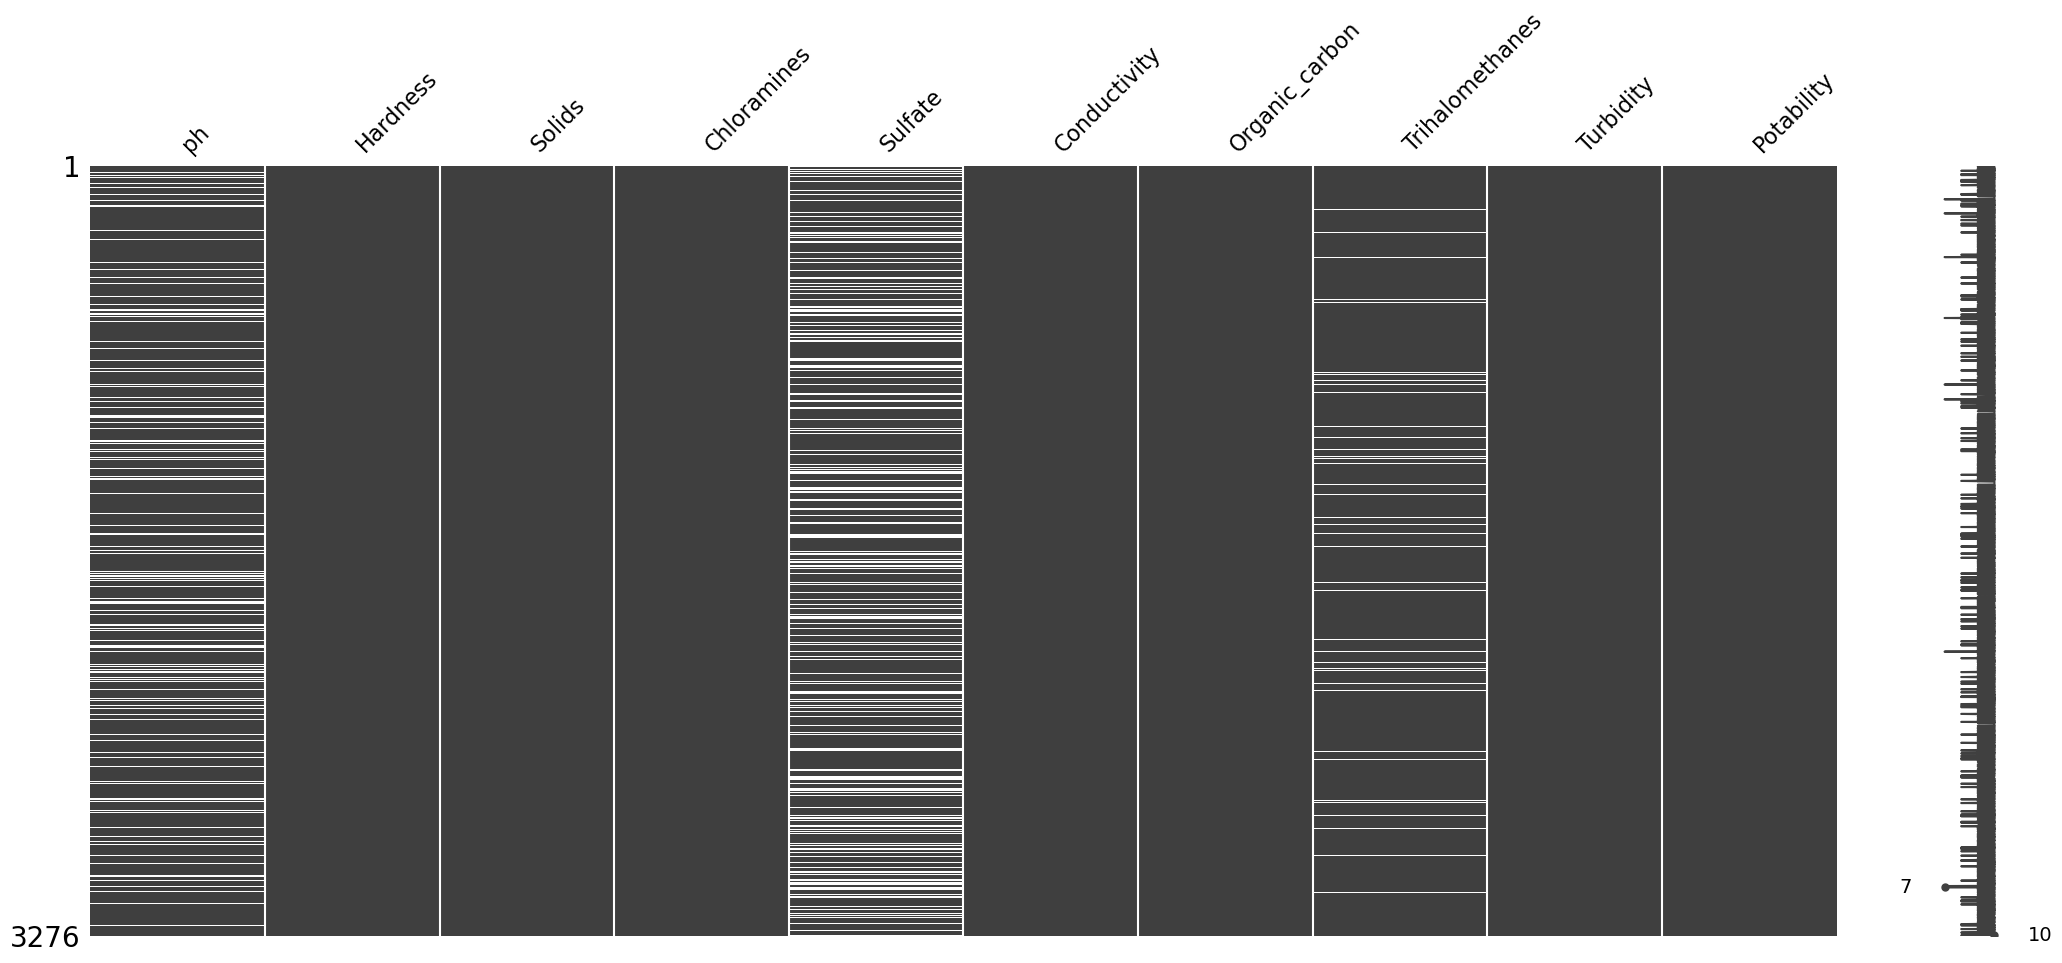

In [16]:
msno.matrix(data)

<Axes: >

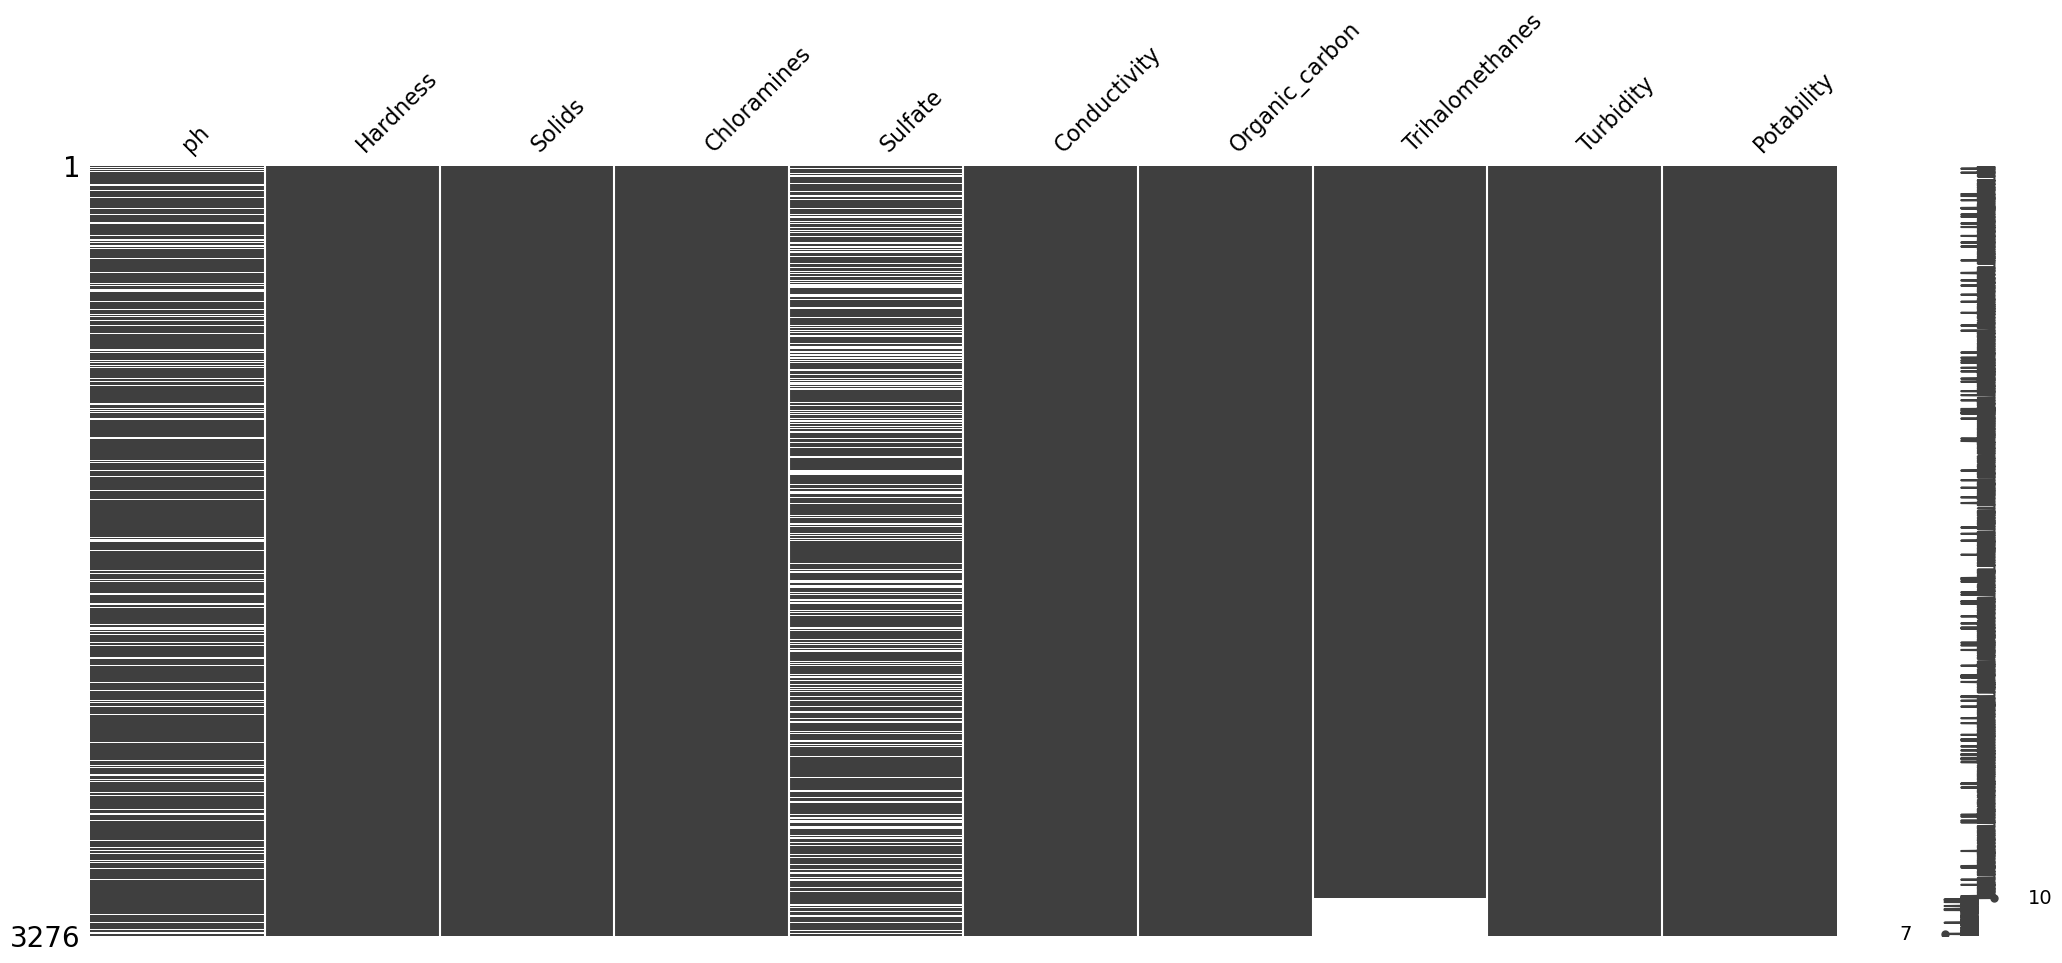

In [17]:
msno.matrix(data.sort_values('Trihalomethanes'))

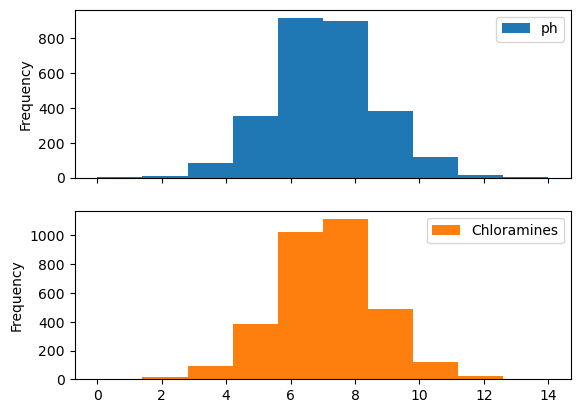

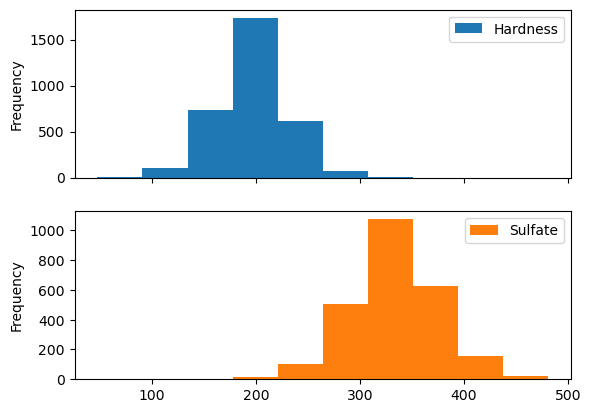

In [18]:
data[['ph','Chloramines']].plot.hist(subplots=True)
plt.show()

data[['Hardness','Sulfate']].plot.hist(subplots=True)
plt.show()

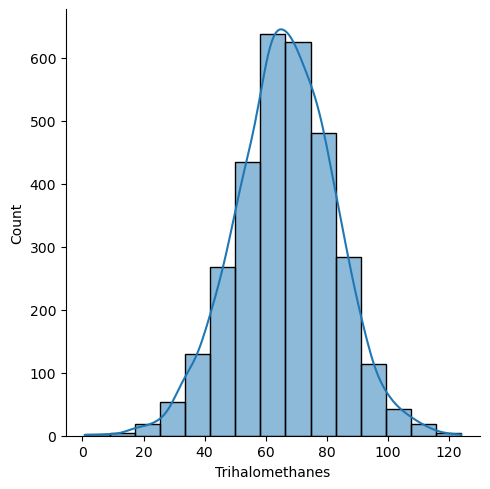

In [19]:
sns.displot(data['Trihalomethanes'], kde=True, bins=15)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [20]:
data.Trihalomethanes = data.Trihalomethanes.fillna(data.Trihalomethanes.mean())

In [21]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['ph', 'Chloramines']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data

array([[0.48780274, 0.54389134],
       [0.26543429, 0.49183921],
       [0.57850887, 0.69854275],
       ...,
       [0.67282217, 0.54780691],
       [0.36619735, 0.46585961],
       [0.56247653, 0.56025878]])

In [23]:
imputed_data = scaler.inverse_transform(imputed_data)
imputed_data

array([[6.82923839, 7.30021187],
       [3.71608008, 6.63524588],
       [8.09912419, 9.2758836 ],
       ...,
       [9.41951032, 7.35023323],
       [5.12676292, 6.30335653],
       [7.87467136, 7.50930586]])

In [24]:
data[['ph', 'Chloramines']] = imputed_data

In [25]:
data.isnull().sum()

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes      0
Turbidity            0
Potability           0
dtype: int64

In [26]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Sulfate', 'Hardness']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
data[['Sulfate', 'Hardness']] = imputed_data

In [27]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[0:-1]],  data['Potability'], test_size=0.2)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [30]:
from sklearn.impute import KNNImputer
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [31]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f1_score(Y_test, y_pred, average='macro'))

[[317  91]
 [149  99]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       408
           1       0.52      0.40      0.45       248

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.62       656

0.5887276260932259


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data[data.columns[0:-1]],  data['Potability'], test_size=0.1)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [35]:
from sklearn.model_selection import GridSearchCV
import numpy as np
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': np.arange(1, 30)}
grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'n_neighbors': 18}


## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [36]:
Y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(classifier.score(X_test,Y_test))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       206
           1       0.56      0.20      0.29       122

    accuracy                           0.64       328
   macro avg       0.61      0.55      0.53       328
weighted avg       0.62      0.64      0.59       328

0.7408536585365854
